In [1]:
# Given an array of integers, can you write a function that returns "True" 
# if there is a triplet (a, b, c) within the array that satisfies a^2 + b^2 = c^2?

# For example:

# Input: arr[] = [3, 1, 4, 6, 5]
# Output: True
# #There is a Pythagorean triplet (3, 4, 5) that exists in the input array.

# Input: arr[] = {10, 4, 6, 12, 5}
# Output: False
# #There is no Pythagorean triplet that exists in the input array.

In [2]:
import numpy as np

In [3]:
def midpoint_search(target, sorted_array):
    '''Function that returns true if arget in sorted array
    Args:
        target (int): target integer
        sorted_array (np.array[int]): numpy integer array
    Returns:
        (bool): if target in array
    '''
    #print(f'target: {target}, sorted_array: {sorted_array}')
    if len(sorted_array) > 1:
        midpoint = int(len(sorted_array)/2)
        #print(sorted_array[midpoint])
        if sorted_array[midpoint] == target:
            return True
        else:
            if sorted_array[midpoint] < target:
                return midpoint_search(target, sorted_array[midpoint:])
            else:
                return midpoint_search(target, sorted_array[:midpoint])
    else:
        if sorted_array[0] == target:
            return True
        else:
            return False
    

In [4]:
test_array = np.array([1,3,5,4,6,7,8, 9, 10,20,12,30,33,34,35,36])
midpoint_search(8, test_array)

True

In [5]:
def contains_triplet(my_list):
    '''Function that eturns true if my_array contains a pythagorian triplet
    Args:
        my_list ([int]): list of integers
    Returns:
        (bool): whether or not my_list containds a pythogorian triplet
    '''
    my_list.sort()
    my_array = np.array(my_list)
    #my_array = np.multiplyt(my_array, mt_array)
    my_array = my_array**2
    #print(my_array)
    for i in range(len(my_array)):
        for j in range(i+1, len(my_array), 1):
            #print(f'my_array[i] my_array[j]: {my_array[i]},  {my_array[j]}')
            #print(f'my_array[i]**2 my_array[j]**2: {my_array[i]**2},  {my_array[j]**2}')
            if midpoint_search(my_array[i] + my_array[j], my_array[j:]):
                return True
    
    return False



In [6]:
contains_triplet([3, 1, 4, 6, 5])

True

In [7]:
contains_triplet([10, 4, 6, 12, 5])

False

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_United_States_federal_executive_orders')
data = dfs[0]
data

,#,President,Party,Total Executive Orders,Order Number Range,Years in Office,Executive Orders Per Year,Period
0,1,George Washington,Unaffiliated,8,unnumbered,7.95,1.0,"April 30, 1789 – March 4, 1797"
1,2,John Adams,Federalist,1,unnumbered,4.00,0.3,"March 4, 1797 – March 4, 1801"
2,3,Thomas Jefferson,Democratic-Republican,4,unnumbered,8.00,0.5,"March 4, 1801 – March 4, 1809"
3,4,James Madison,Democratic-Republican,1,unnumbered,8.00,0.1,"March 4, 1809 – March 4, 1817"
4,5,James Monroe,Democratic-Republican,1,unnumbered,8.00,0.1,"March 4, 1817 – March 4, 1825"
5,6,John Quincy Adams,Democratic-Republican,3,unnumbered,4.00,0.8,"March 4, 1825 – March 4, 1829"
6,7,Andrew Jackson,Democrat,12,unnumbered,8.00,1.5,"March 4, 1829 – March 4, 1837"
7,8,Martin Van Buren,Democrat,10,unnumbered,4.00,2.5,"March 4, 1837 – March 4, 1841"
8,9,William Henry Harrison,Whig,0,unnumbered,0.08,0.0,"March 4, 1841 – April 4, 1841"
9,10,John Tyler,Whig,17,unnumbered,3.92,4.3,"April 4, 1841 – March 4, 1845"


In [20]:
data['Executive Orders Per Week'] = data['Executive Orders Per Year']/52

Text(0, 0.5, 'Executive Orders Per Week')

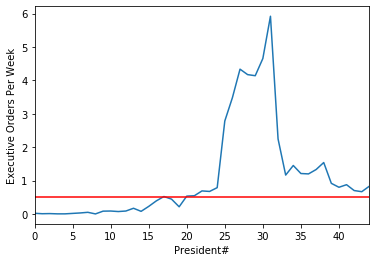

In [21]:
plt = data['Executive Orders Per Week'].plot()
plt.axhline(y=0.5, color='r', linestyle='-')
plt.set_xlabel('President#')
plt.set_ylabel('Executive Orders Per Week')

In [16]:
#Who was the first president to sign more than 1 executive order ever 2 weeks
for row in data.itertuples(index=False):
    #print(row)
    if (row[6]/52) >= 0.5:
        print(row)
        break

Pandas(_0=18, President='Ulysses S. Grant', Party='Republican', _3='217', _4='unnumbered', _5=8.0, _6=27.1, Period='March 4, 1869 – March 4, 1877', _8=0.5211538461538462)


In [17]:
# When was the last time a US president signed less than 1 
# executive order on average in a 2 week period?

#reverse index df
reversed_data = data.reindex(index=data.index[::-1])

for row in reversed_data.itertuples(index=False):
    #print(row)
    if (row[6]/52) <= 0.5:
        print(row)
        break

Pandas(_0=20, President='James A. Garfield', Party='Republican', _3='6', _4='unnumbered', _5=0.54, _6=11.1, Period='March 4, 1881 – September 19, 1881', _8=0.21346153846153845)
